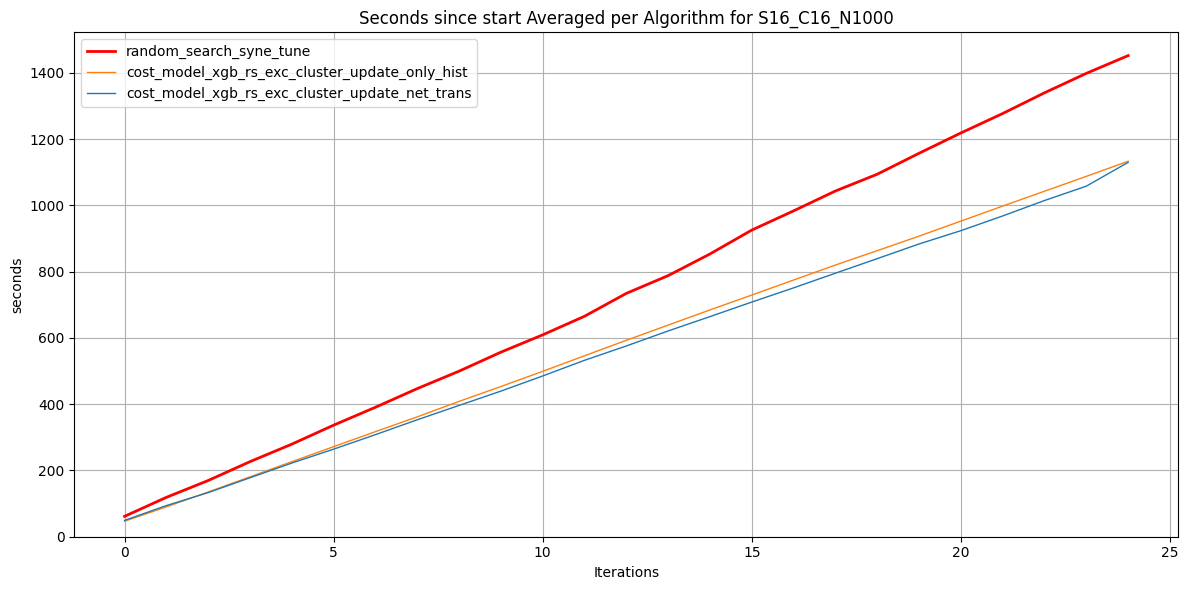

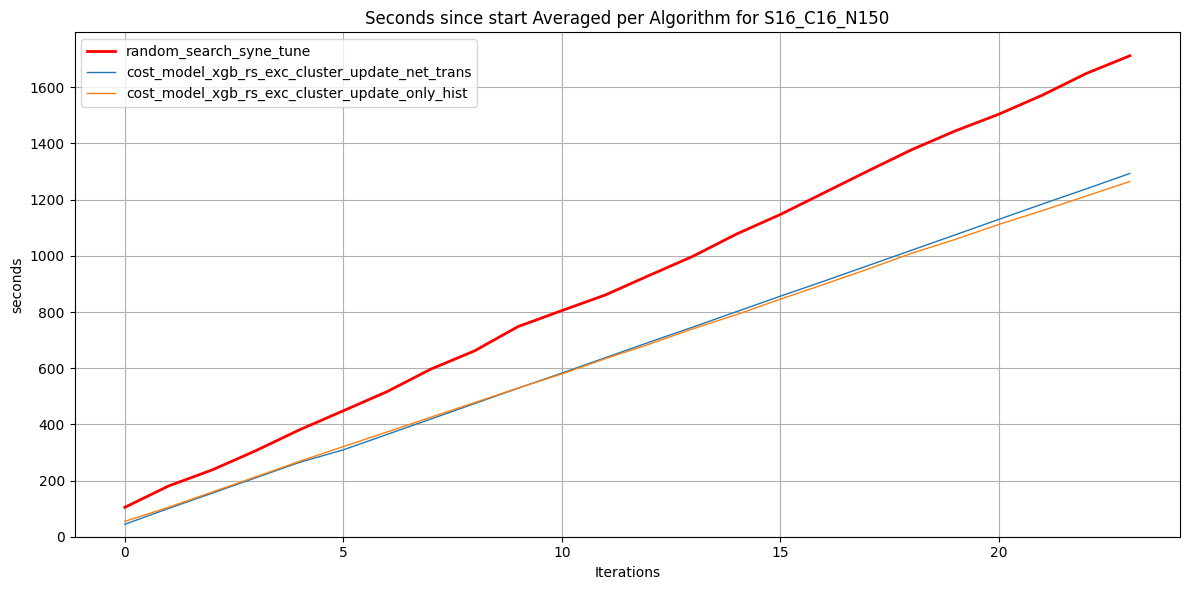

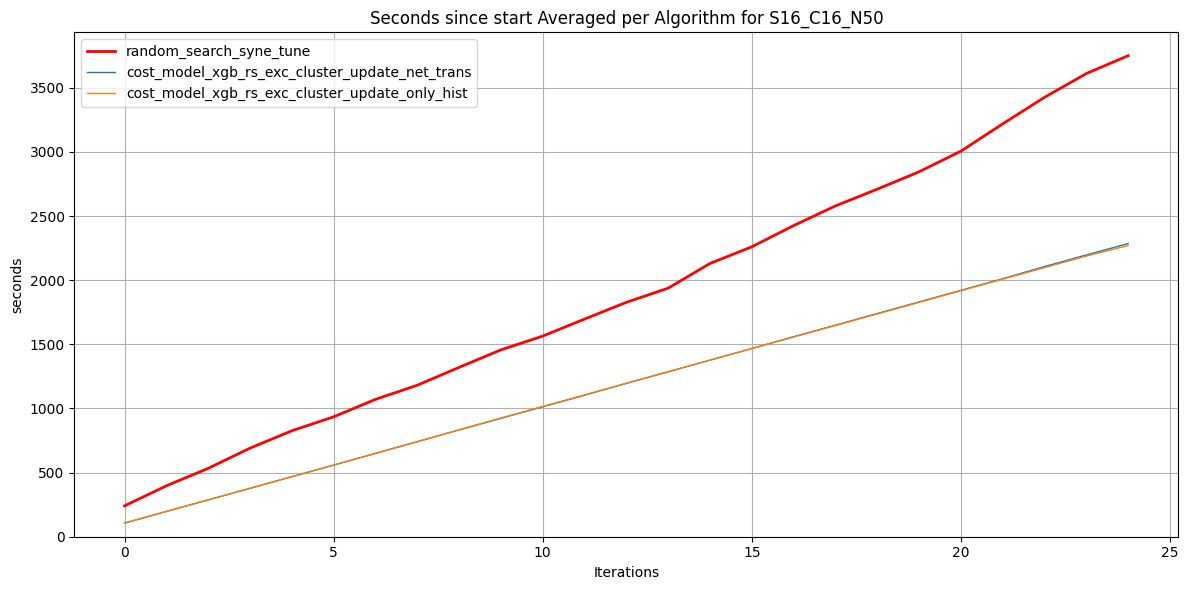

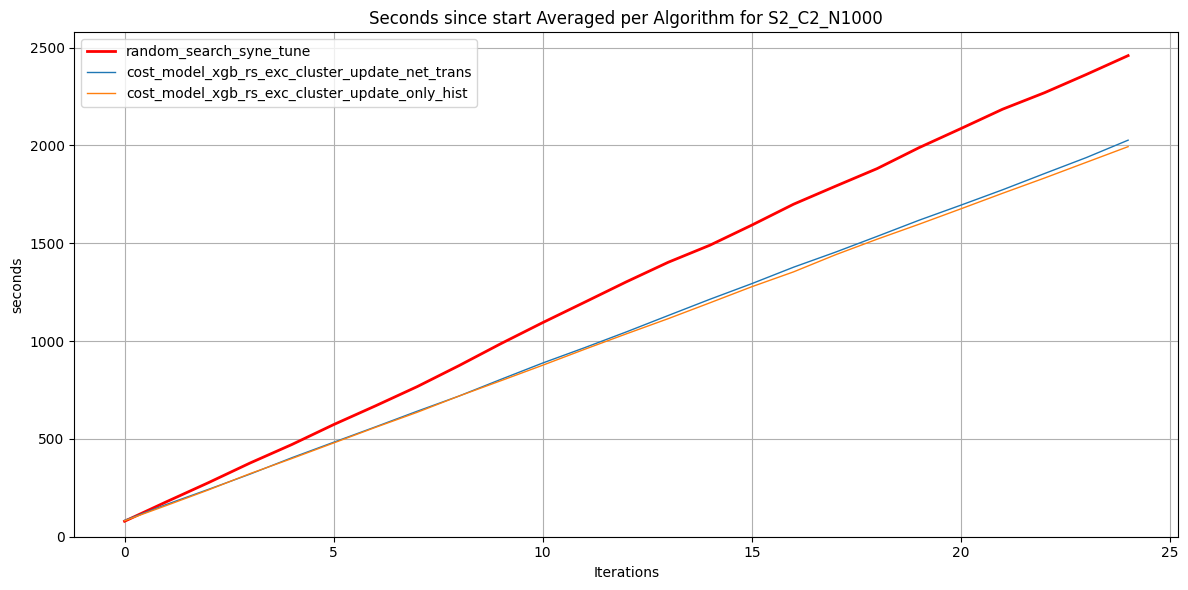

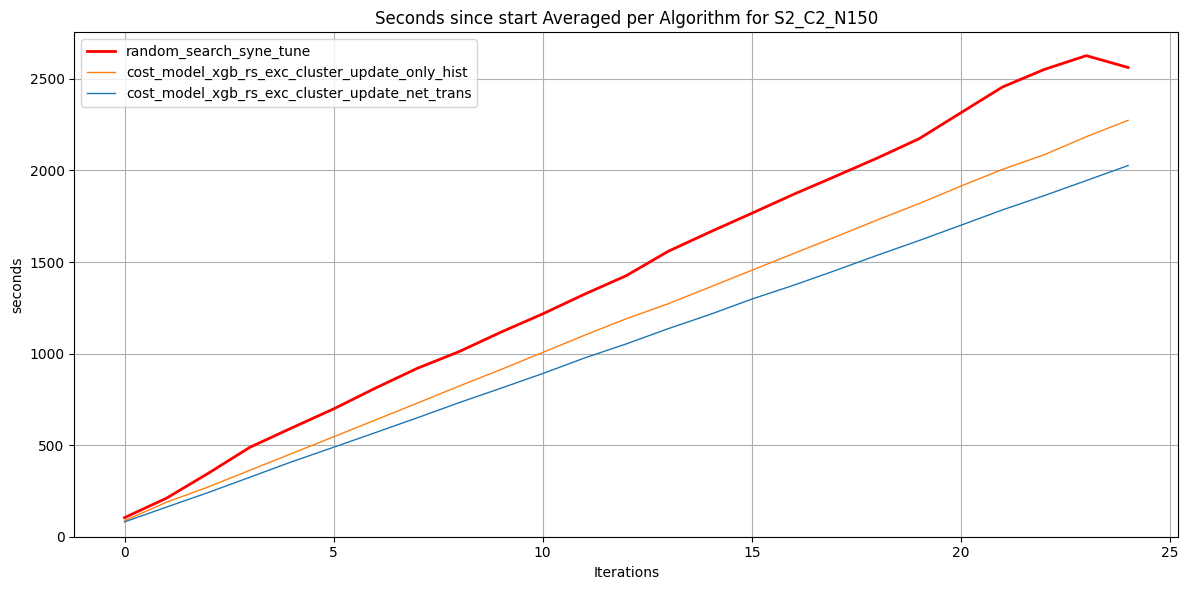

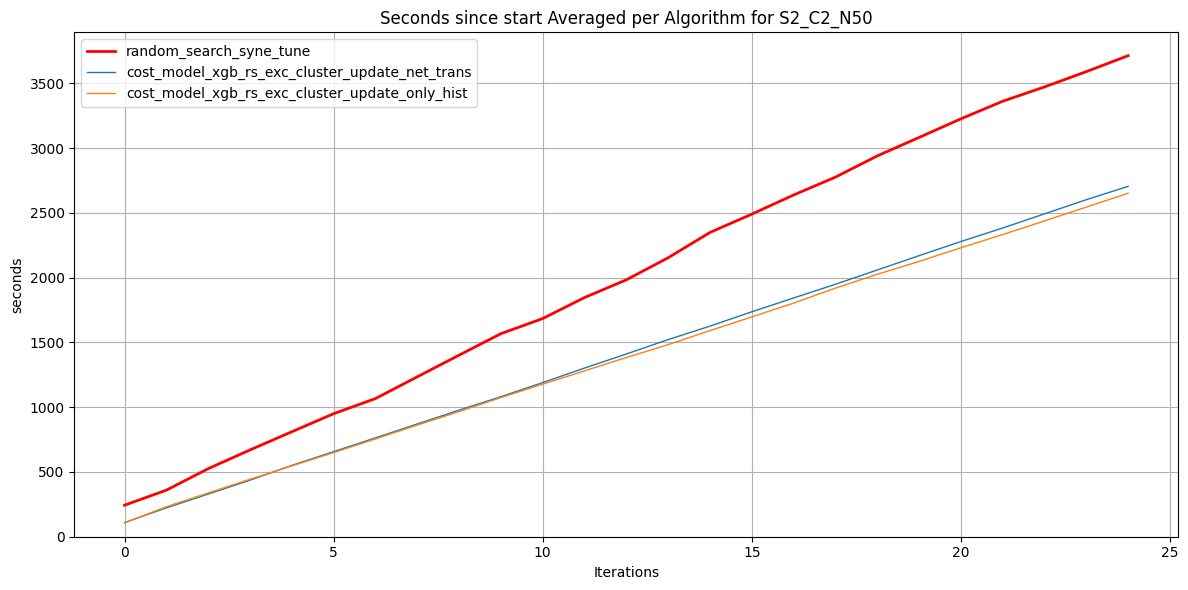

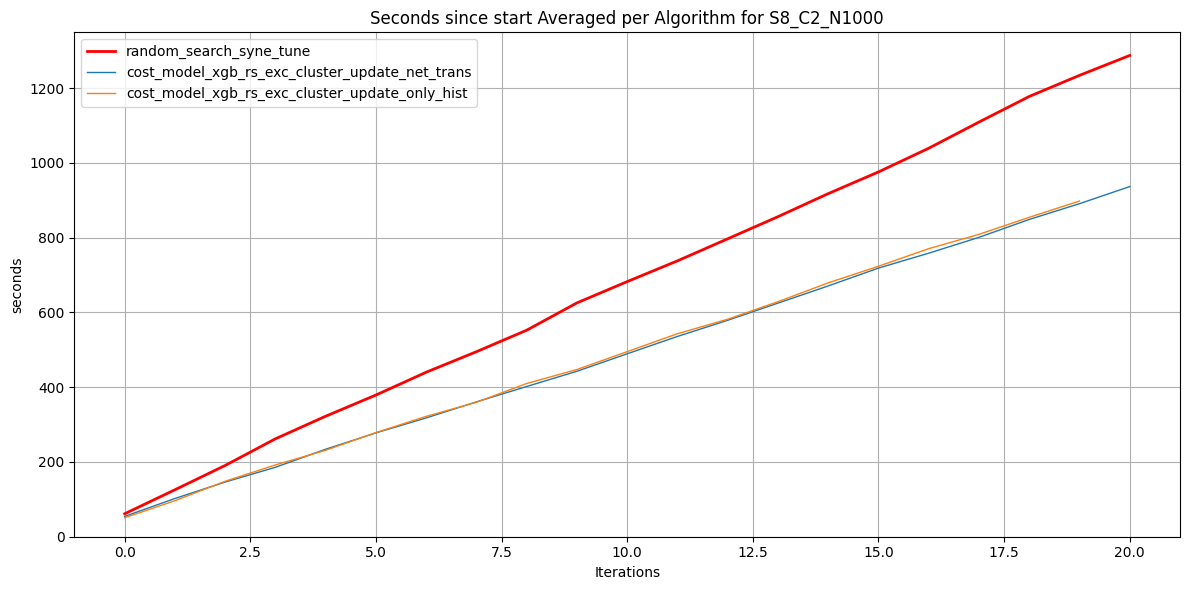

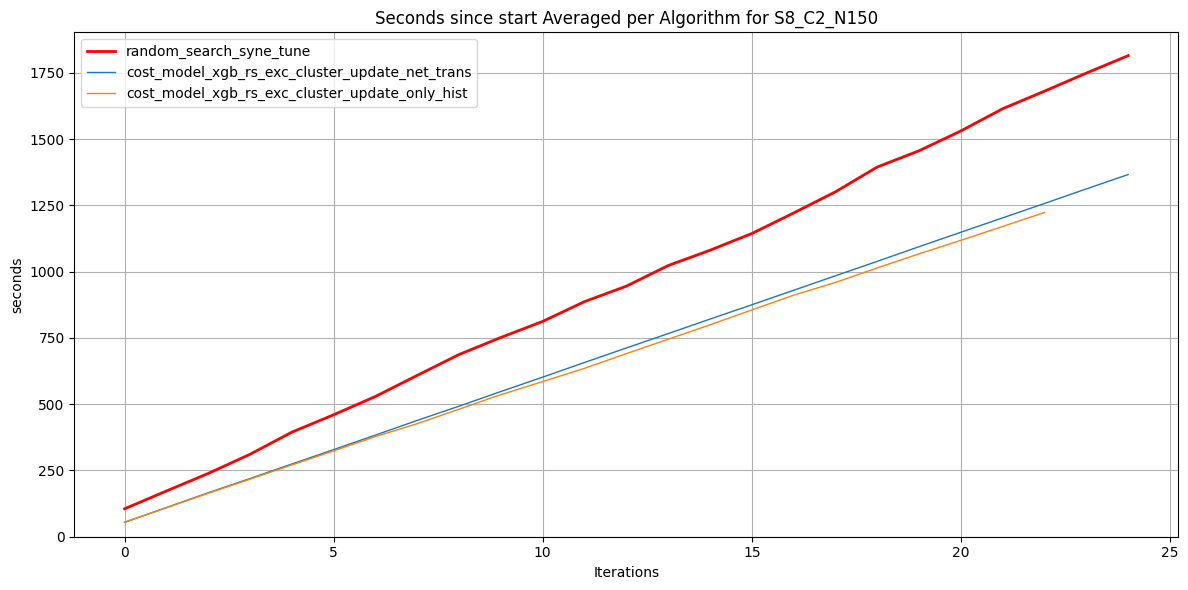

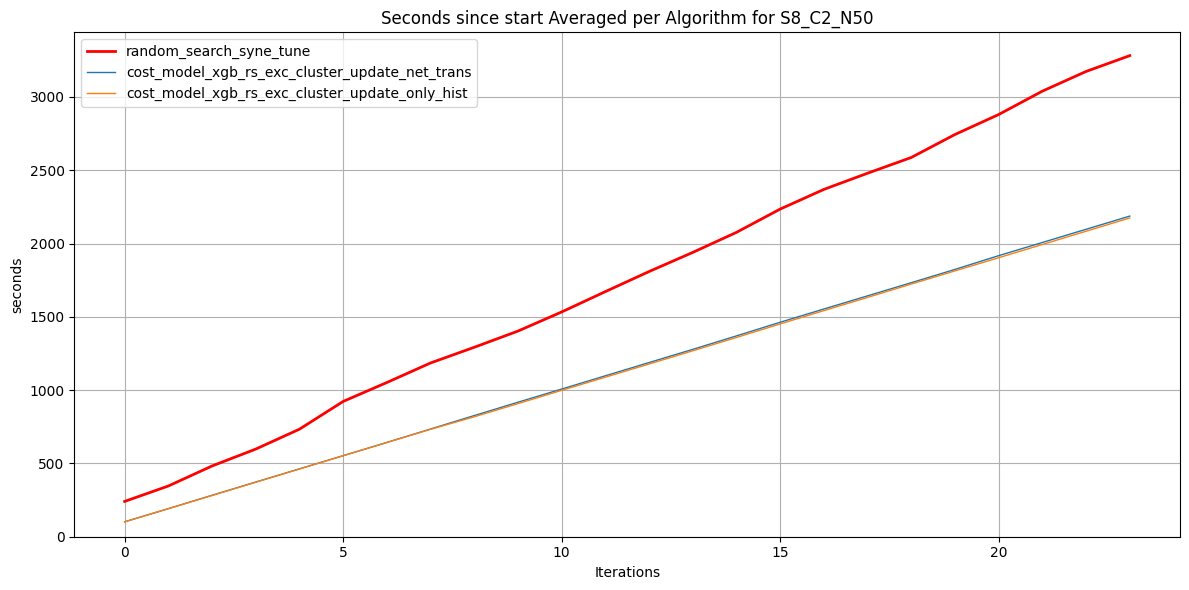

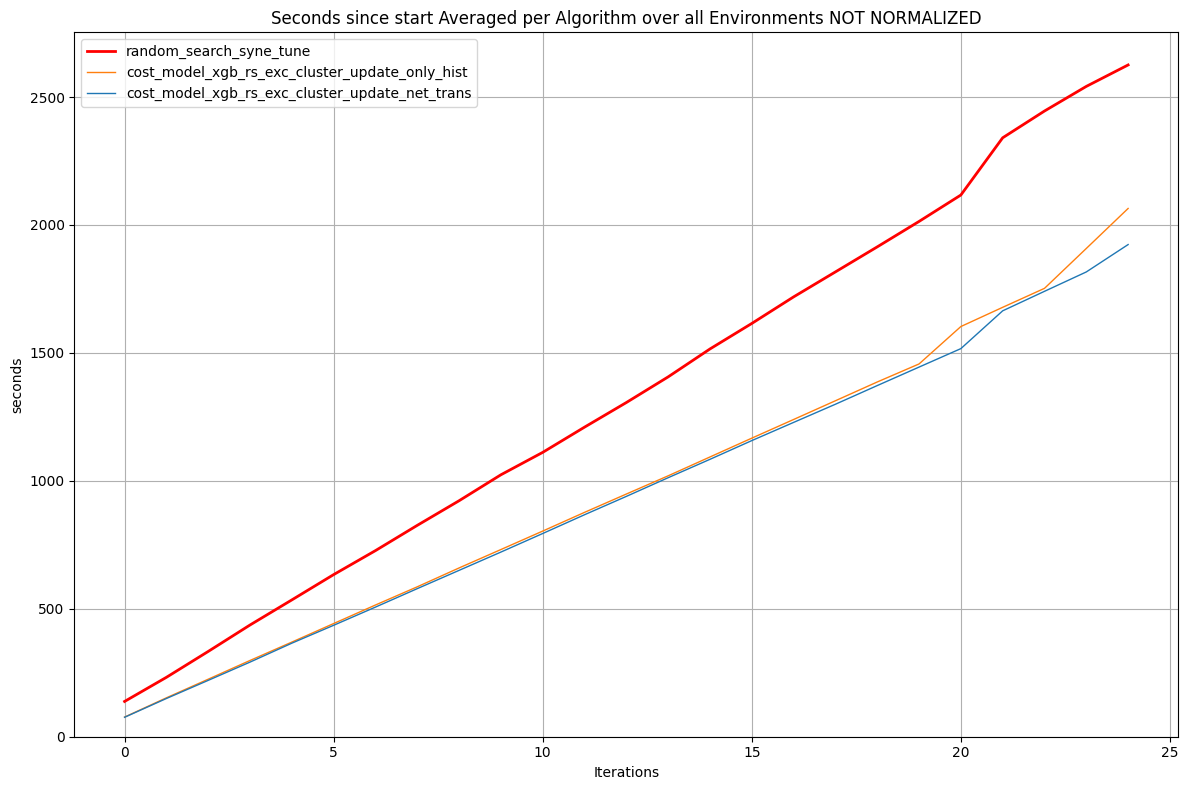

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import yaml
from itertools import cycle

algorithms = [
    "random_search_syne_tune", 
    #"own_random_search",
    #"bayesian_open_box", 

    # still used transfer algorithms :
    #"quantile_exc",
    #"tlbo_rgpe_prf_exc",    
    #"tlbo_topov3_prf_exc",

    # unsused algorithms
    #"bayesian_syne_tune", 
    #"zero_shot_exc",
    #"zero_shot_all",
    #"quantile_all", 
    #"cost_model_rfs_all",
    #"cost_model_rfs_exc",
    #"tlbo_rgpe_prf_all",
    #"tlbo_sgpr_prf_all",    
    #"tlbo_topov3_prf_all",    
    #"tlbo_rgpe_gp_all",    
    #"tlbo_sgpr_gp_all",
    #"tlbo_topov3_gp_all", 
    #"tlbo_sgpr_prf_exc",  
    #"tlbo_rgpe_gp_exc",    
    #"tlbo_sgpr_gp_exc",    
    #"tlbo_topov3_gp_exc",

    # old cost model variations
    #"cost_model_rfs_bay_exc_w_update",
    #"cost_model_rfs_bay_exc_w_update_cluster",
    #"cost_model_rfs_rs_exc_w_update",
    #"cost_model_rfs_rs_exc_w_update_cluster",
   # "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err",
   # "cost_model_rfs_rs_exc_w_update_clusterhist_w_ratio_sqr_err",
   # "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err_net_trans",
   # "cost_model_rfs_rs_exc_w_update_clusterhist_w_ratio_sqr_err_net_trans"
    #"cost_model_rfs_rs_exc"



    # all new cost model variations:
    #"cost_model_rfs_rs_exc_cluster_update_net_trans_hist_ratio",

    #"cost_model_rfs_rs_exc_cluster_update_net_trans",
    #"cost_model_rfs_rs_exc_cluster_update_hist_ratio",
    #"cost_model_rfs_rs_exc_update_net_trans_hist_ratio",

    #"cost_model_rfs_rs_exc_cluster_update",
    #"cost_model_rfs_rs_exc_cluster_net_trans",
    #"cost_model_rfs_rs_exc_update_net_trans",
    #"cost_model_rfs_rs_exc_update_hist_ratio",

    #"cost_model_rfs_rs_exc_cluster",
    #"cost_model_rfs_rs_exc_update",
    #"cost_model_rfs_rs_exc_net_trans",

    #"cost_model_rfs_rs_exc",

    #"cost_model_rfs_rs_exc_cluster_update_only_hist",
    #"cost_model_rfs_rs_exc_update_only_hist",
    "cost_model_xgb_rs_exc_cluster_update_net_trans",
    "cost_model_xgb_rs_exc_cluster_update_only_hist",
]

#file_lists = [file_list_env_1,file_list_env_2,file_list_env_3,file_list_env_4,file_list_env_5,file_list_env_6,file_list_env_7,file_list_env_8,file_list_env_9]

file_lists = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_1310k/*/*/*.csv')


dict_overview = {}

for file_list in [file_lists]:
    #plt.figure(figsize=(10, 6))

    if file_list is None:
        continue

    env = ""
    algo = ""
    
    for file_path in file_list:
        #print(file_path)
        env = file_path.split("/")[-1].split("\\")[-3]
        algo = file_path.split("\\")[-2]
        #print(algo)

        #if "_n_" in algo:
        #    continue

        #print(algo)
    

        #the names of the transfer algorithms differ per environemnt. so map them to a simple name
        if "zero_shot_transfer_exc" in algo : 
            algo = "zero_shot_exc"
        if "zero_shot_transfer_all" in algo : 
            algo = "zero_shot_all"


        if "own_random_search" in algo:
            algo = "own_random_search"

        if "zero_shot_exc" in algo : 
            algo = "zero_shot_exc"
        if "zero_shot_all" in algo : 
            algo = "zero_shot_all"

        
        if "quantile_exc" in algo : 
            algo = "quantile_exc"
        if "quantile_all" in algo : 
            algo = "quantile_all"
            
        if "quantile_transfer_exc" in algo : 
            algo = "quantile_exc"
        if "quantile_transfer_all" in algo : 
            algo = "quantile_all"
            
        if "tlbo_rgpe_prf_all" in algo : 
            algo = "tlbo_rgpe_prf_all"
        if "tlbo_sgpr_prf_all" in algo : 
            algo = "tlbo_sgpr_prf_all"
        if "tlbo_topov3_prf_all" in algo : 
            algo = "tlbo_topov3_prf_all"
        if "tlbo_rgpe_gp_all" in algo : 
            algo = "tlbo_rgpe_gp_all"
        if "tlbo_sgpr_gp_all" in algo : 
            algo = "tlbo_sgpr_gp_all"
        if "tlbo_topov3_gp_all" in algo : 
            algo = "tlbo_topov3_gp_all"
        if "tlbo_rgpe_prf_exc" in algo : 
            algo = "tlbo_rgpe_prf_exc"
        if "tlbo_sgpr_prf_exc" in algo : 
            algo = "tlbo_sgpr_prf_exc"
        if "tlbo_topov3_prf_exc" in algo : 
            algo = "tlbo_topov3_prf_exc"
        if "tlbo_rgpe_gp_exc" in algo : 
            algo = "tlbo_rgpe_gp_exc"
        if "tlbo_sgpr_gp_exc" in algo : 
            algo = "tlbo_sgpr_gp_exc"
        if "tlbo_topov3_gp_exc" in algo : 
            algo = "tlbo_topov3_gp_exc"

        if "bayesian_open_box" in algo:
            algo = "bayesian_open_box"


        if algo == "cost_model_rfs_bay_exc_w_update":
            algo = "cost_model_rfs_bay_exc_w_update"
        elif algo == "cost_model_rfs_bay_exc_w_update_cluster":
            algo = "cost_model_rfs_bay_exc_w_update_cluster"
        elif algo == "cost_model_rfs_rs_exc_w_update":
            algo = "cost_model_rfs_rs_exc_w_update"
        elif algo == "cost_model_rfs_rs_exc_w_update_cluster":
            algo = "cost_model_rfs_rs_exc_w_update_cluster"
        elif algo == "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err":
            algo = "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err"
        elif algo == "cost_model_rfs_rs_cluster_exc_w_updatehist_w_ratio_sqr_err":
            alog = "cost_model_rfs_rs_cluster_exc_w_updatehist_w_ratio_sqr_err"
        elif algo == "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err_net_trans":
            algo = "cost_model_rfs_rs_exc_w_updatehist_w_ratio_sqr_err_net_trans"
        elif algo == "cost_model_rfs_rs_cluster_exc_w_updatehist_w_ratio_sqr_err_net_trans":
            alog = "cost_model_rfs_rs_cluster_exc_w_updatehist_w_ratio_sqr_err_net_trans"




        #all run witn n = 300, train_transfers = 250
        if algo == "cost_model_rfs_rs_exc_cluster_update_net_trans_hist_ratio":
            alog = "cost_model_rfs_rs_exc_cluster_update_net_trans_hist_ratio"

        if algo == "cost_model_rfs_rs_exc_cluster_update_net_trans":
            alog = "cost_model_rfs_rs_exc_cluster_update_net_trans"
        if algo == "cost_model_rfs_rs_exc_cluster_update_hist_ratio":
            alog = "cost_model_rfs_rs_exc_cluster_update_hist_ratio"
        if algo == "cost_model_rfs_rs_exc_update_net_trans_hist_ratio":
            alog = "cost_model_rfs_rs_exc_update_net_trans_hist_ratio"

        if algo == "cost_model_rfs_rs_exc_cluster_update":
            alog = "cost_model_rfs_rs_exc_cluster_update"
        if algo == "cost_model_rfs_rs_exc_cluster_net_trans":
            alog = "cost_model_rfs_rs_exc_cluster_net_trans"
        if algo == "cost_model_rfs_rs_exc_update_net_trans":
            alog = "cost_model_rfs_rs_exc_update_net_trans"
        if algo == "cost_model_rfs_rs_exc_update_hist_ratio":
            alog = "cost_model_rfs_rs_exc_update_hist_ratio"
        
        if algo == "cost_model_rfs_rs_exc_cluster":
            alog = "cost_model_rfs_rs_exc_cluster"
        if algo == "cost_model_rfs_rs_exc_update":
            alog = "cost_model_rfs_rs_exc_update"
        if algo == "cost_model_rfs_rs_exc_net_trans":
            alog = "cost_model_rfs_rs_exc_net_trans"

        if algo == "cost_model_rfs_rs_exc":
            alog = "cost_model_rfs_rs_exc"


        if algo == "cost_model_rfs_rs_exc_cluster_update_only_hist":
            alog = "cost_model_rfs_rs_exc_cluster_update_only_hist"
        if algo == "cost_model_rfs_rs_exc_update_only_hist":
            alog = "cost_model_rfs_rs_exc_update_only_hist"

        if algo == "cost_model_rfs_bay_exc_cluster_update_only_hist":
            alog = "cost_model_rfs_bay_exc_cluster_update_only_hist"
        if algo == "cost_model_rfs_bay_exc_update_only_hist":
            alog = "cost_model_rfs_bay_exc_update_only_hist"


        if algo == "cost_model_rfs_rs_exc_cluster_update_net_trans_currated_data":
            alog = "cost_model_rfs_rs_exc_cluster_update_net_trans_currated_data"
        if algo == "cost_model_rfs_rs_exc_cluster_update_only_hist_currated_data":
            alog = "cost_model_rfs_rs_exc_cluster_update_only_hist_currated_data"

        if algo == "cost_model_gdb_rs_exc_cluster_update_net_trans":
            alog = "cost_model_gdb_rs_exc_cluster_update_net_trans"
        if algo == "cost_model_gdb_rs_exc_cluster_update_only_hist":
            alog = "cost_model_gdb_rs_exc_cluster_update_only_hist"

        if algo == "cost_model_xgb_rs_exc_cluster_update_net_trans":
            alog = "cost_model_xgb_rs_exc_cluster_update_net_trans"
        if algo == "cost_model_xgb_rs_exc_cluster_update_only_hist":
            alog = "cost_model_xgb_rs_exc_cluster_update_only_hist"

        if algo == "cost_model_xgb_rs_exc_cluster_update_net_trans_tuned":
            alog = "cost_model_xgb_rs_exc_cluster_update_net_trans_tuned"
        if algo == "cost_model_xgb_rs_exc_cluster_update_only_hist_tuned":
            alog = "cost_model_xgb_rs_exc_cluster_update_only_hist_tuned"


        if algo not in algorithms:
            continue

        if env not in dict_overview.keys() :
            dict_overview[env] = dict()
        if algo not in dict_overview[env].keys(): 
            dict_overview[env][algo] = []

        df = pd.read_csv(file_path)
        if len(df) < 24:
            continue
        #print(file_path)
        df = df[df['time'].notna()]
        df = df[df['transfer_id'] > 0]
        
        run_name = file_path.split('/')[-1].replace('.csv', '').replace('results\\', '')

        new_df = pd.DataFrame()

        new_df[run_name] = df['seconds_since_start_of_opt_run'].head(25)[df['seconds_since_start_of_opt_run'].notna()]





        new_df.reset_index(drop=True, inplace = True)

        dict_overview[env][algo].append(new_df)


# Get the default colors from matplotlib
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


default_colors_cycle = cycle([color for color in default_colors if color != "red"])  # Exclude red
color_mapping = {alg: (next(default_colors_cycle) if alg != "random_search_syne_tune" else "red") for alg in algorithms}





dict_averages_per_env_per_algo = {}



for env in dict_overview.keys():
   
    for algo in dict_overview[env].keys():
        
        if "reset" in algo: # exclude runs that might be faulty
            continue
        if "_all" in algo:
            continue

        not_present = True
        for elem in algos_to_view:
            if elem in algo:
                not_present = False

        #if "tlbo" in algo:
        #    continue

        #if not_present:
        #    continue

        
        #plt.figure(figsize=(10, 6))
        if len(dict_overview[env][algo]) == 0:
            continue
        df = pd.concat(dict_overview[env][algo][:15], axis=1, ignore_index=True)
        
        num_of_columns = len(df.columns)
        df_avg = df.mean(axis=1, skipna=True)
        std = df.std(axis=1, skipna=True)

        if env not in dict_averages_per_env_per_algo.keys() :
            dict_averages_per_env_per_algo[env] = dict()
        if algo not in dict_averages_per_env_per_algo[env].keys(): 
            dict_averages_per_env_per_algo[env][algo] = []

        dict_averages_per_env_per_algo[env][algo] = df_avg






dict_env_dfs = {}

for env in dict_averages_per_env_per_algo.keys():

    df_to_plot = pd.DataFrame()
    
    for algo in dict_averages_per_env_per_algo[env].keys():
        df_to_plot[algo] = dict_averages_per_env_per_algo[env][algo]
        
    dict_env_dfs[env] = df_to_plot
    

# plot for each environment


for env in dict_env_dfs.keys():

    df = dict_env_dfs[env]
    sorted_columns = df.iloc[-1].sort_values(ascending=False).index
    df_sorted = df[sorted_columns]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot each algorithm with its specified color
    for col in df_sorted.columns:
        df_sorted[col].plot(
            ax=ax,
            label=col,
            color=color_mapping.get(col, "black"),  # Use 'black' as the default if not in mapping
            linewidth=2 if col == "random_search_syne_tune" else 1,  # Highlight one specific algorithm
        )
    
    # Customize the legend
    #ax.legend(title="Algorithms", bbox_to_anchor=(1.05, 0.5), loc="center left")
    plt.legend()
    
    ax.set_yscale('linear')


    
    # Add labels, title, and grid
    plt.xlabel("Iterations")
    plt.ylabel("seconds")
    plt.title(f'Seconds since start Averaged per Algorithm for {env}')
    plt.tight_layout()
    plt.grid(True)
    plt.ylim(bottom=0)
    # Show the plot
    plt.show()







#plot averaged over all environments


algorithms = set()
for df in dict_env_dfs.values():
    algorithms.update(df.columns)

# Create a new DataFrame to hold the mean values for each algorithm
mean_dataframe = pd.DataFrame()

for algo in algorithms:
        # Collect columns for the current algorithm from all DataFrames
    algo_columns = []
    for df in dict_env_dfs.values():
        if algo in df.columns:
            algo_columns.append(df[algo])

    # Concatenate and compute the mean across rows
    if algo_columns:
        combined_algo_data = pd.concat(algo_columns, axis=1)
        mean_dataframe[algo] = combined_algo_data.mean(axis=1)



df = mean_dataframe
sorted_columns = df.iloc[-1].sort_values(ascending=False).index
df_sorted = df[sorted_columns]
    
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
    
# Plot each algorithm with its specified color
for col in df_sorted.columns:
    df_sorted[col].plot(
        ax=ax,
        label=col,
        color=color_mapping.get(col, "black"),  # Use 'black' as the default if not in mapping
        linewidth=2 if col == "random_search_syne_tune" else 1,  # Highlight one specific algorithm
    )
    
# Customize the legend
#ax.legend(title="Algorithms")#, bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.legend()
    
ax.set_yscale('linear')


# Add labels, title, and grid
plt.xlabel("Iterations")
plt.ylabel("seconds")
plt.title(f'Seconds since start Averaged per Algorithm over all Environments NOT NORMALIZED')
plt.tight_layout()
plt.grid(True)
plt.ylim(bottom=0)
# Show the plot
plt.show()